In [2]:
import matplotlib.pyplot as plt
import numpy as np
import wave

Enter the number of points in the input signal : 3
Enter the value of n for which the signal starts :-1
x[-1.0] = 0
x[0.0] = 1
x[1.0] = 0
n = [-1.  0.  1.]
x[n] = [0.0, 1.0, 0.0]


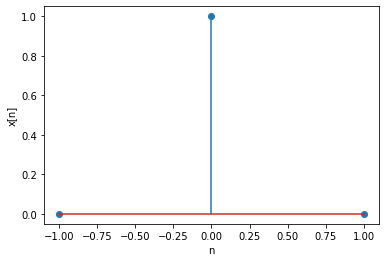

In [2]:
#Q1
def plot_signal(x,signal):
      plt.xlabel("n")
      plt.ylabel("x[n]")
      plt.stem(x, signal, use_line_collection = True) 
      plt.show()

def input_signal(n):
    #Taking the the number of points in the input signal
    num = int(input("Enter the number of points in the input signal : "))
    #Array for storing the discrte input signal
    signal = []
    #vraiable for checking number of complex inputs
    c = 0
    
    ind = int(input("Enter the value of n for which the signal starts :"))
    n = np.linspace(ind,num+ind-1,num)

    for i in range(num):
        k = complex(input("x["+str(n[i])+"] = ")) #Taking the discrete inputs from user
        if np.iscomplex(k):
          c+=1
        signal.append(k)

    print("n = ",end="")
    print(n)

    if (c == 0):
      real = []
      for s in signal:
        real.append(s.real)
      print("x[n] = ",end="")
      print(real)
      #Stem plot
      plot_signal(n,real)
      plt.show()
      return real

    else:
      mag = []
      phase = []
      for i in range(num):
        mag.append(abs(signal[i]))
        phase.append(np.angle(signal[i]))
      print("x[n] = ",end="")
      print(signal)
      plt.xlabel("n")
      plt.ylabel("Magnitude")
      plt.stem(n,mag,use_line_collection = True)
      plt.show()
      plt.xlabel("n")
      plt.ylabel("Phase")
      plt.stem(n,phase,use_line_collection = True)
      plt.show()
      return signal

n = []
x = input_signal(n)

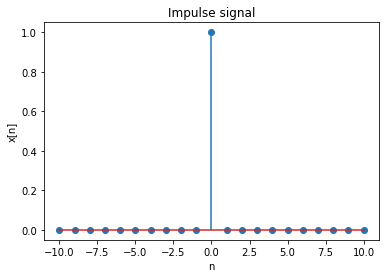

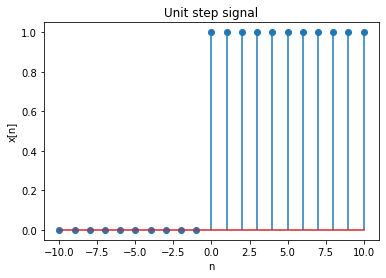

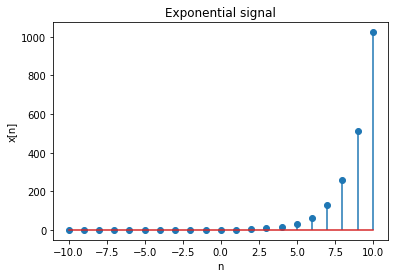

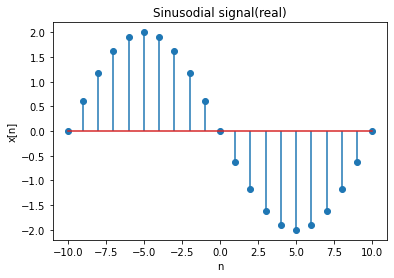

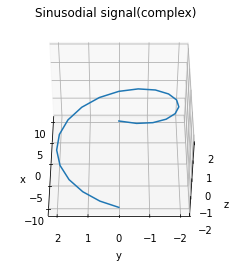

In [3]:
## Q2
#Number of points in the input signal
c = 21

signal = []
x = []
#x = -c/2 to c/2
x.append(int(-c/2))
for i in range(1,c):
  x.append(x[i-1] + 1)


#Impulse signal
for i in range(c):
  if(x[i] == 0):
    signal.append(1)
  else:
    signal.append(0)
plt.title("Impulse signal")
plot_signal(x,signal)

#Unit step signal
for i in range(c):
  if(x[i] >= 0):
    signal[i] = 1
  else:
    signal[i] = 0
plt.title("Unit step signal")
plot_signal(x,signal)

#Real exponential signal
a = 2
for i in range(c):
  signal[i] = a**(x[i])
plt.title("Exponential signal")
plot_signal(x,signal)

#Sinusodial signal
A = 2
w = np.pi/10
phi = np.pi/2
sinusodial_real = []
sinusodial_imag = []
for i in range(c):
    sinusodial_real.append(A*(np.cos(w*x[i] + phi)))
    sinusodial_imag.append(A*(np.sin(w*x[i] + phi)))
plt.title("Sinusodial signal(real)")
plot_signal(x,sinusodial_real)
ax = plt.gca(projection = '3d')
ax.plot(x,sinusodial_real,sinusodial_imag,label= "Sinusodial signal(complex)")
plt.title("Sinusodial signal(complex)")
ax.view_init(45,180)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


Enter the number of points in the input signal : 3
Enter the value of n for which the signal starts :-1
x[-1.0] = 0
x[0.0] = 1
x[1.0] = 0
n = [-1.  0.  1.]
x[n] = [0.0, 1.0, 0.0]


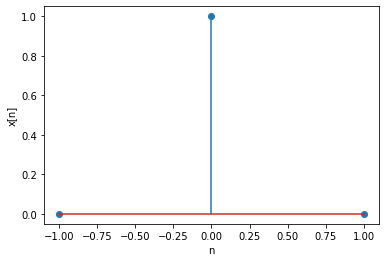

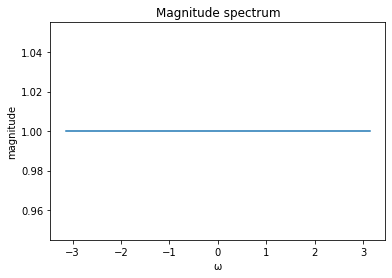

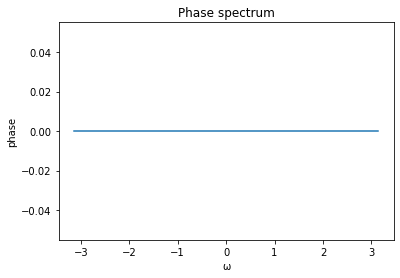

In [4]:
#Q3

#Analysys equation
def DTFT(signal,n,w):
  y = []
  #Appending the summations for all omegas(w)
  for i in range(len(w)):

    #Summation for analysis equation for a particular omega(w[i])
    sum = 0
    for j in range(len(signal)):
      sum += signal[j]*complex(np.cos(w[i]*n[j]),-np.sin(w[i]*n[j]))
    y.append(np.round(sum,decimals = 4))
  return y

def plot_spectrums(y,w):
  mag = []
  phase = []
  for i in range(len(w)):
    mag.append(abs(y[i]))
    p = np.angle(y[i])
    phase.append(p)
  #Plotting the spectrums
  plt.title("Magnitude spectrum")
  plt.xlabel("ω")
  plt.ylabel("magnitude")
  plt.plot(w,mag)
  plt.show()

  plt.title("Phase spectrum")
  plt.xlabel("ω")
  plt.ylabel("phase")
  plt.plot(w,phase)
  plt.show()

# #Enter the signal in this variable
n = []
signal = input_signal(n)

#Number of values of w
N = 10
#omega in the range -π ≤ ω < π
w = np.linspace(-np.pi, np.pi, N)
n = []
n.append(int(-len(signal)/2))
for i in range(1,len(signal)):
  n.append(n[i-1] + 1)

y = DTFT(signal,n,w)
plot_spectrums(y,w)

In [5]:
#Q4
def conjugate(y):
  y_conjugate = []
  for s in y:
    y_conjugate.append(complex(s.real,-1*s.imag))
  return y_conjugate

def plot(dtft,w):
  real = []
  imag = []
  for s in dtft:
    real.append(s.real)
    imag.append(s.imag)
  plt.ylabel("real")
  plt.xlabel("w")
  plt.title("DTFT(real part)")
  plt.plot(w,real)
  plt.show()
  plt.ylabel("imaginary")
  plt.xlabel("w")
  plt.title("DTFT(imaginary part)")
  plt.plot(w,imag)
  plt.show()

def neg(w):
    neg_w = []
    for s in w:
        neg_w.append(-1*s)
    return neg_w

n = []
n = np.linspace(int(-len(signal)/2),int(len(signal)/2),len(signal))

#Number of values of w
N = 20
#omega in the range -π ≤ ω < π
w = np.linspace(-np.pi, np.pi,N,endpoint = False)

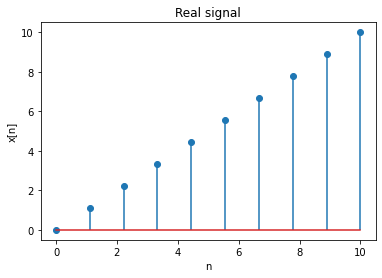

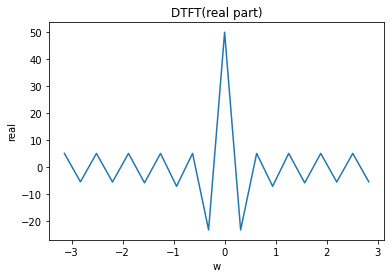

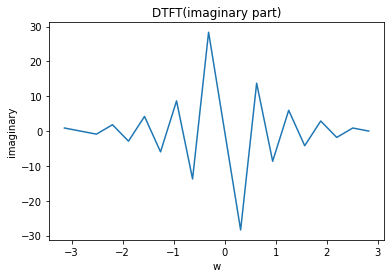

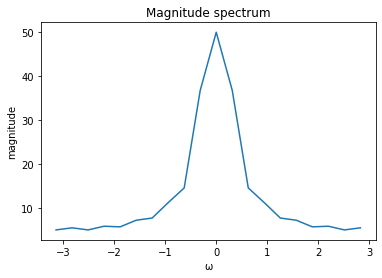

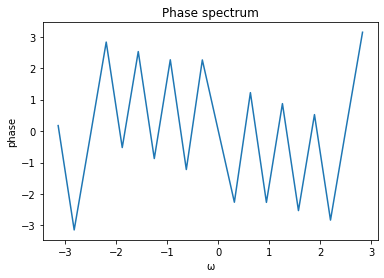

dtft[n] = [(5+0.8816j), (-5.5556-0j), (5-0.8816j), (-5.6292+1.8199j), (5-2.8868j), (-5.9467+4.1955j), (5-5.9588j), (-7.2222+8.6603j), (5-13.7374j), (-23.4241+28.3564j), (50+0j), (-23.4241-28.3564j), (5+13.7374j), (-7.2222-8.6603j), (5+5.9588j), (-5.9467-4.1955j), (5+2.8868j), (-5.6292-1.8199j), (5+0.8816j), (-5.5556+0j)]

dtft*[-n] = [(5+0.8816j), (-5.5556-0j), (5-0.8816j), (-5.6292+1.8199j), (5-2.8868j), (-5.9467+4.1955j), (5-5.9588j), (-7.2222+8.6603j), (5-13.7374j), (-23.4241+28.3564j), (50-0j), (-23.4241-28.3564j), (5+13.7374j), (-7.2222-8.6603j), (5+5.9588j), (-5.9467-4.1955j), (5+2.8868j), (-5.6292-1.8199j), (5+0.8816j), (-5.5556+0j)]


In [6]:
#4(a)
#Real signal(x[n] = n)
signal = []
num = 10
n = np.linspace(0,num,num)
for i in range(num):
    signal.append(n[i])
plt.title("Real signal")
plot_signal(n,signal)

dtft = DTFT(signal,n,w)
plot(dtft,w)
plot_spectrums(dtft,w)

neg_w = neg(w)

#dtft[-n](X(e^-jw))
neg_dtft = DTFT(signal,n,neg_w)

#dtft*[-n](X*(e^-jw))
conjugate_neg_dtft = conjugate(neg_dtft)

print("dtft[n] = ",end = '')
print(dtft)
print()
print("dtft*[-n] = ",end = '')
print(conjugate_neg_dtft)



*   From the above result we see that dtft[n] = dtft*[-n]
*   So, DTFT is conjugate symmetric for real signals.


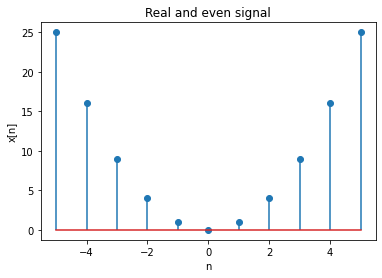

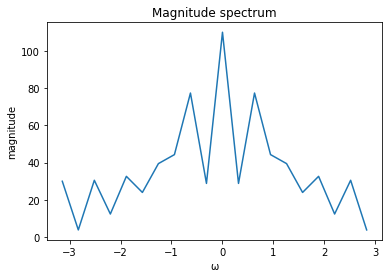

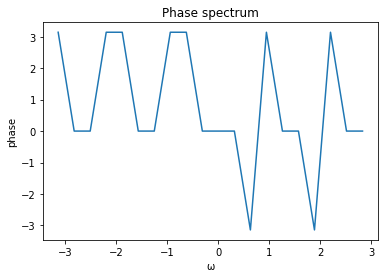

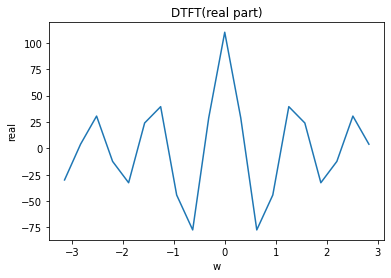

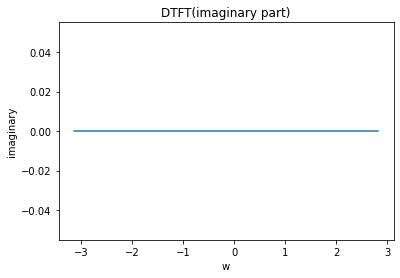

dtft[n] = [(-30+0j), (3.8784+0j), (30.5279+0j), (-12.4172+0j), (-32.6393+0j), (24+0j), (39.4721+0j), (-44.3041+0j), (-77.3607+0j), (28.8429+0j), (110+0j), (28.8429+0j), (-77.3607-0j), (-44.3041+0j), (39.4721-0j), (24+0j), (-32.6393-0j), (-12.4172+0j), (30.5279-0j), (3.8784+0j)]

dtft[-n] = [(-30+0j), (3.8784+0j), (30.5279-0j), (-12.4172+0j), (-32.6393-0j), (24+0j), (39.4721-0j), (-44.3041+0j), (-77.3607-0j), (28.8429+0j), (110+0j), (28.8429+0j), (-77.3607+0j), (-44.3041+0j), (39.4721+0j), (24+0j), (-32.6393+0j), (-12.4172+0j), (30.5279+0j), (3.8784+0j)]


In [7]:
#4(b)
#Real and even signal(x[n] = n^2)
signal = []
num = 10
n = np.linspace(-num/2,num/2,num+1)
for i in range(num+1):
    signal.append(n[i]**2)
plt.title("Real and even signal")
plot_signal(n,signal)

dtft = DTFT(signal,n,w)
plot_spectrums(dtft,w)
plot(dtft,w)

neg_w = neg(w)
neg_dtft = neg_dtft = DTFT(signal,n,neg_w)
#Printing DTFT[n](X(e^jw))
print("dtft[n] = ",end = '')
print(dtft)
print()
#Printing DTFT[-n](X(e^-jw)) (For checking even property)
print("dtft[-n] = ",end = '')
print(neg_dtft)


*   From the above result we see the imaginary parts of all the elements in dtft is zero and dtft[n] = dtft[-n]
*   So, DTFT of a real and even signal is real and even.



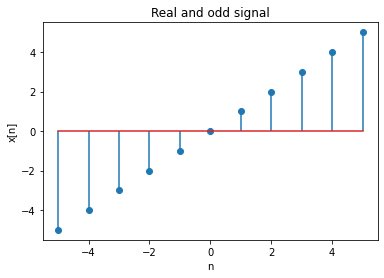

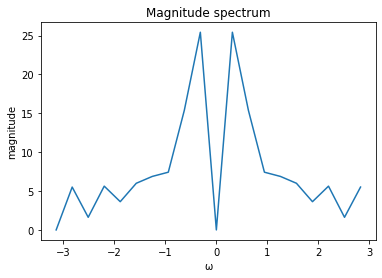

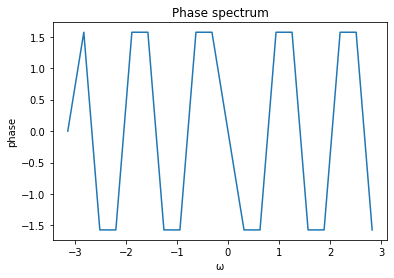

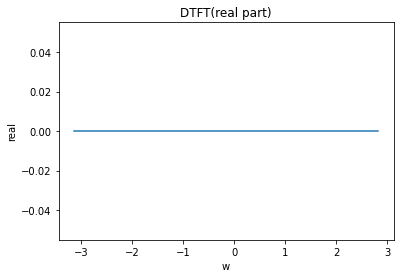

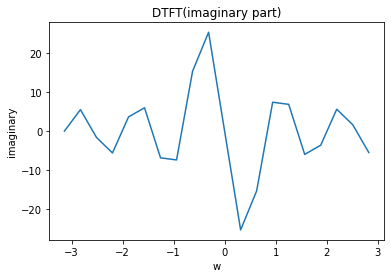

dtft[n] = [0j, 5.5125j, -1.6246j, -5.6298j, 3.6327j, (-0+6j), -6.8819j, (-0-7.4259j), 15.3884j, (-0+25.4317j), 0j, (-0-25.4317j), -15.3884j, (-0+7.4259j), 6.8819j, (-0-6j), -3.6327j, 5.6298j, 1.6246j, -5.5125j]

dtft[-n] = [-0j, -5.5125j, 1.6246j, 5.6298j, -3.6327j, (-0-6j), 6.8819j, (-0+7.4259j), -15.3884j, (-0-25.4317j), 0j, (-0+25.4317j), 15.3884j, (-0-7.4259j), -6.8819j, (-0+6j), 3.6327j, -5.6298j, -1.6246j, 5.5125j]


In [8]:
#4(c)
#Real and odd signal(x[n] = n)
signal = []
num = 10
n = np.linspace(-num/2,num/2,num+1)
for i in range(num+1):
    signal.append(n[i])
plt.title("Real and odd signal")
plot_signal(n,signal)

dtft = DTFT(signal,n,w)
plot_spectrums(dtft,w)
plot(dtft,w)

neg_w = neg(w)
neg_dtft = neg_dtft = DTFT(signal,n,neg_w)

#Printing DTFT[n](X(e^jw))
print("dtft[n] = ",end = '')
print(dtft)
print()
#Printing DTFT[-n](X(e^-jw)) (For checking odd property)
print("dtft[-n] = ",end = '')
print(neg_dtft)

*   From the above result we see the real parts of all the elements in dtft is zero and dtft[n] = -dtft[-n]
*   So, DTFT of a real and odd signal is imaginary and odd.

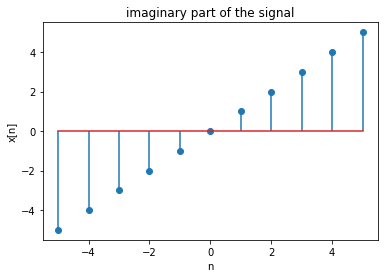

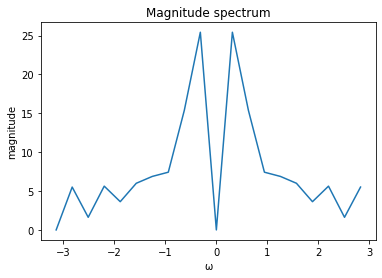

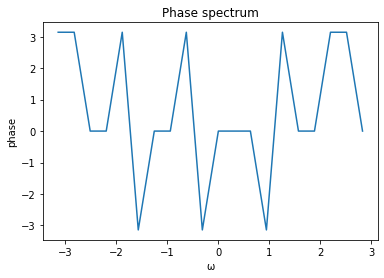

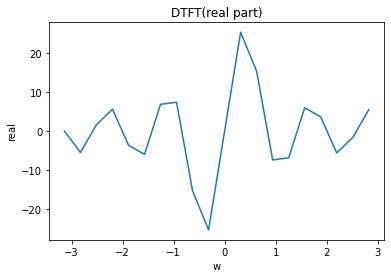

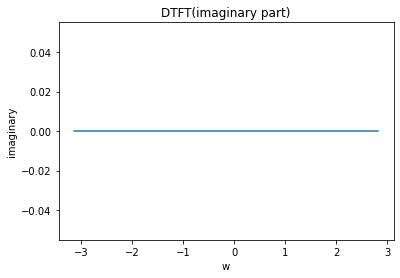

dtft[n] = [(-0+0j), (-5.5125+0j), (1.6246+0j), (5.6298+0j), (-3.6327+0j), (-6-0j), (6.8819+0j), (7.4259-0j), (-15.3884+0j), (-25.4317-0j), 0j, (25.4317-0j), (15.3884+0j), (-7.4259-0j), (-6.8819+0j), (6-0j), (3.6327+0j), (-5.6298+0j), (-1.6246+0j), (5.5125+0j)]

dtft*[-n] = [-0j, (5.5125-0j), (-1.6246-0j), (-5.6298-0j), (3.6327-0j), (6+0j), (-6.8819-0j), (-7.4259+0j), (15.3884-0j), (25.4317+0j), -0j, (-25.4317+0j), (-15.3884-0j), (7.4259+0j), (6.8819-0j), (-6+0j), (-3.6327-0j), (5.6298-0j), (1.6246-0j), (-5.5125-0j)]


In [9]:
#4(d)
#Purely imaginary signal(x[n] = jn)
signal = []
sig_imag = []
num = 10
n = np.linspace(-num/2,num/2,num+1)
for i in range(num+1):
    signal.append(1j*n[i])
    sig_imag.append(signal[i].imag)
plt.title("imaginary part of the signal")
plot_signal(n,sig_imag)

dtft = DTFT(signal,n,w)
plot_spectrums(dtft,w)
plot(dtft,w)

neg_w = neg(w)
#dtft[-n]
neg_dtft = DTFT(signal,n,neg_w)

#dtft*[-n](X*(e^-jw))
conjugate_neg_dtft = conjugate(neg_dtft)

print("dtft[n] = ",end = '')
print(dtft)
print()
print("dtft*[-n] = ",end = '')
print(conjugate_neg_dtft)

*   From the above result we see that dtft[n] = -dtft*[-n]
*   So, The DTFT is conjugate odd symmetric for purely imaginary signals

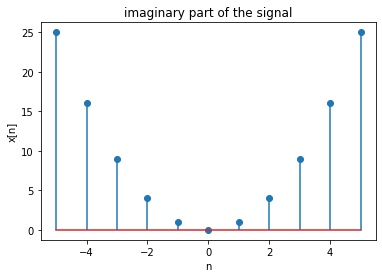

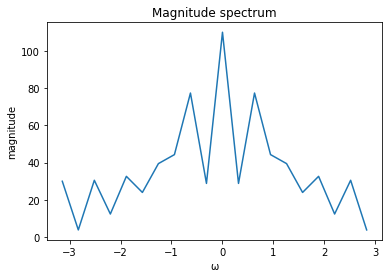

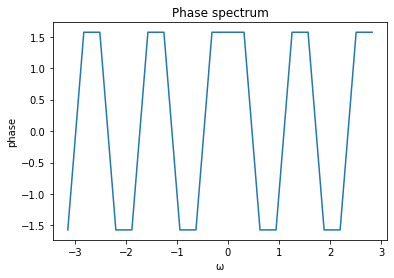

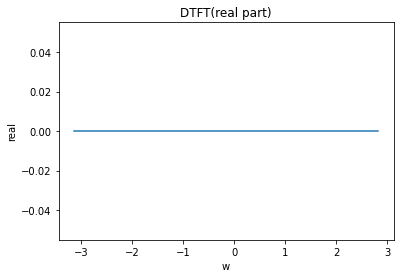

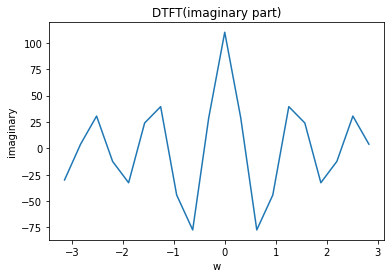

dtft[n] = [-30j, 3.8784j, (-0+30.5279j), -12.4172j, (-0-32.6393j), 24j, (-0+39.4721j), -44.3041j, (-0-77.3607j), 28.8429j, 110j, 28.8429j, -77.3607j, -44.3041j, 39.4721j, 24j, -32.6393j, -12.4172j, 30.5279j, 3.8784j]

dtft[-n] = [-30j, 3.8784j, 30.5279j, -12.4172j, -32.6393j, 24j, 39.4721j, -44.3041j, -77.3607j, 28.8429j, 110j, 28.8429j, (-0-77.3607j), -44.3041j, (-0+39.4721j), 24j, (-0-32.6393j), -12.4172j, (-0+30.5279j), 3.8784j]


In [10]:
#4(e)
#Imaginary and even signal(x[n] = jn^2)
signal = []
sig_imag = []
num = 10
n = np.linspace(-num/2,num/2,num+1)
for i in range(num+1):
    signal.append(1j*n[i]**2)
    sig_imag.append(signal[i].imag)
plt.title("imaginary part of the signal")
plot_signal(n,sig_imag)

dtft = DTFT(signal,n,w)
plot_spectrums(dtft,w)
plot(dtft,w)

neg_w = neg(w)
neg_dtft = neg_dtft = DTFT(signal,n,neg_w)
#Printing DTFT[n](X(e^jw))
print("dtft[n] = ",end = '')
print(dtft)
print()
#Printing DTFT[-n](X(e^-jw)) (For checking even property)
print("dtft[-n] = ",end = '')
print(neg_dtft)

*   From the above result we see the real parts of all the elements in dtft is zero and dtft[n] = dtft[-n]
*   So, DTFT of an imaginary and even signal is imaginary and even.

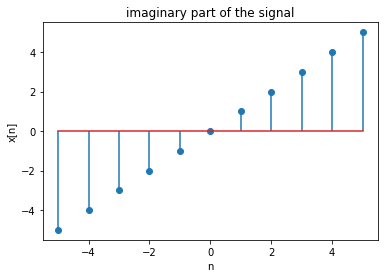

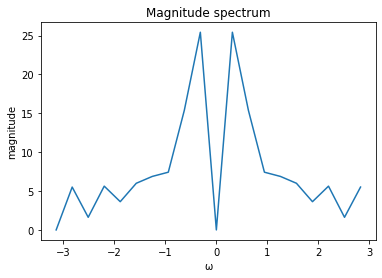

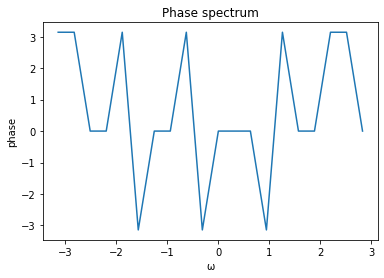

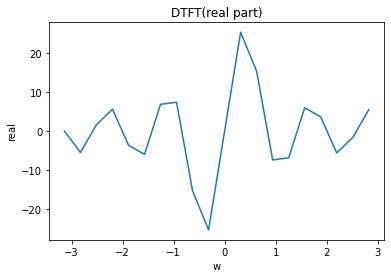

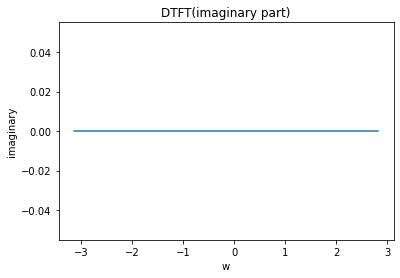

dtft[n] = [(-0+0j), (-5.5125+0j), (1.6246+0j), (5.6298+0j), (-3.6327+0j), (-6-0j), (6.8819+0j), (7.4259-0j), (-15.3884+0j), (-25.4317-0j), 0j, (25.4317-0j), (15.3884+0j), (-7.4259-0j), (-6.8819+0j), (6-0j), (3.6327+0j), (-5.6298+0j), (-1.6246+0j), (5.5125+0j)]

dtft[-n] = [0j, (5.5125+0j), (-1.6246+0j), (-5.6298+0j), (3.6327+0j), (6-0j), (-6.8819+0j), (-7.4259-0j), (15.3884+0j), (25.4317-0j), 0j, (-25.4317-0j), (-15.3884+0j), (7.4259-0j), (6.8819+0j), (-6-0j), (-3.6327+0j), (5.6298+0j), (1.6246+0j), (-5.5125+0j)]


In [11]:
#4(f)
#Imaginary and odd signal(x[n] = jn)
signal = []
sig_imag = []
num = 10
n = np.linspace(-num/2,num/2,num+1)
for i in range(num+1):
    signal.append(1j*n[i])
    sig_imag.append(signal[i].imag)
plt.title("imaginary part of the signal")
plot_signal(n,sig_imag)

dtft = DTFT(signal,n,w)
plot_spectrums(dtft,w)
plot(dtft,w)

neg_w = neg(w)
neg_dtft = neg_dtft = DTFT(signal,n,neg_w)
#Printing DTFT[n](X(e^jw))
print("dtft[n] = ",end = '')
print(dtft)
print()
#Printing DTFT[-n](X(e^-jw)) (For checking odd property)
print("dtft[-n] = ",end = '')
print(neg_dtft)

*   From the above result we see the imaginary parts of all the elements in dtft is zero and dtft[n] = -dtft[-n]
*   So, DTFT of an imaginary and ood signal is imaginary and odd.

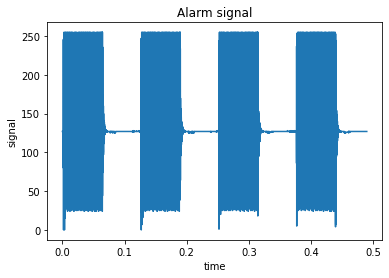

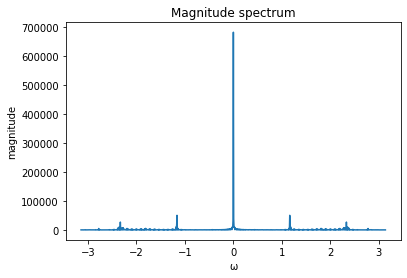

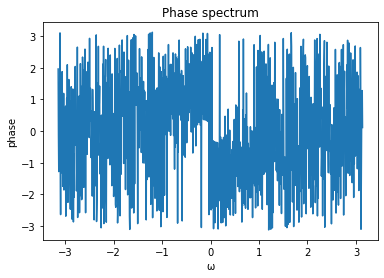

In [12]:
#Q5  
# reading the audio file 
alarm = wave.open("alarm.wav",'rb') 
alarm_signal = alarm.readframes(-1)
signal = []
for i in range(len(alarm_signal)):
    signal.append(alarm_signal[i])
nf = len(signal)
r = alarm.getframerate()
time = nf/r
x = np.linspace(1/r,time,nf)
plt.title("Alarm signal")
plt.xlabel("time")
plt.ylabel("signal")
plt.plot(x,signal)
plt.show()

#Number of values of w
N = 1000
#omega in the range 20Hz ≤ ω < 20kHz
w = np.linspace(-np.pi,np.pi,N,endpoint = False)
n = np.linspace(0,nf,nf)
dtft = []
dtft = DTFT(signal,n,w)
plot_spectrums(dtft,w)


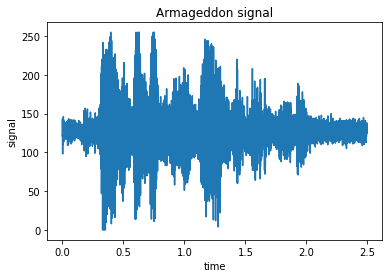

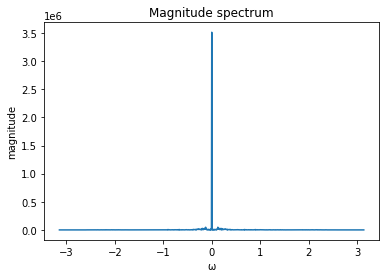

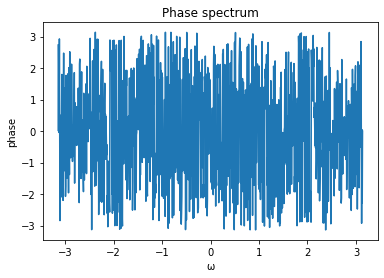

In [13]:
armageddon = wave.open("armageddon.wav") 
      
armageddon_signal = armageddon.readframes(-1) 
signal = []
for i in range(len(armageddon_signal)):
    signal.append(armageddon_signal[i])
nf = len(signal)
r = alarm.getframerate()
time = nf/r
x = np.linspace(1/r,time,nf)
plt.title("Armageddon signal")
plt.xlabel("time")
plt.ylabel("signal")
plt.plot(x,signal)
plt.show()


n = np.linspace(0,nf,nf)
dtft = DTFT(signal,n,w)
plot_spectrums(dtft,w)

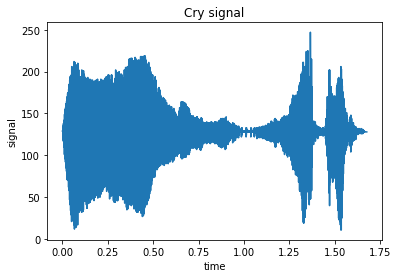

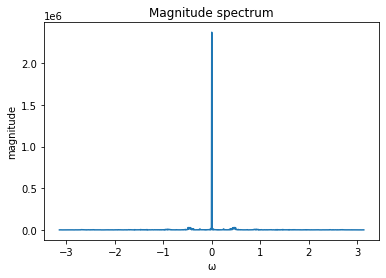

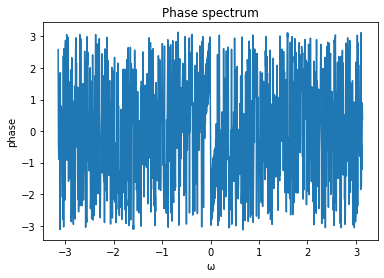

In [14]:
cry = wave.open("cry.wav") 

cry_signal = cry.readframes(-1) 
signal = []
for i in range(len(cry_signal)):
    signal.append(cry_signal[i])

nf = len(signal)
r = alarm.getframerate()
time = nf/r
x = np.linspace(1/r,time,nf)
plt.title("Cry signal")
plt.xlabel("time")
plt.ylabel("signal")
plt.plot(x,signal)
plt.show()

dtft = []
n = np.linspace(0,nf,nf)
dtft = DTFT(signal,n,w)
plot_spectrums(dtft,w)

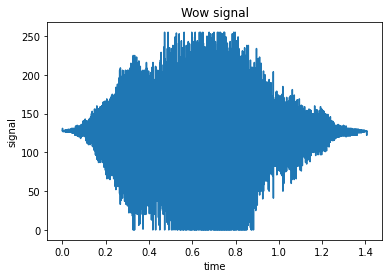

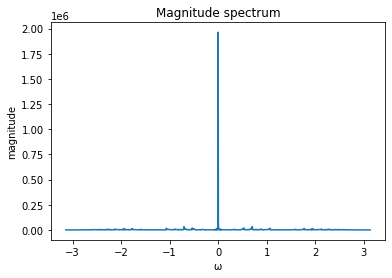

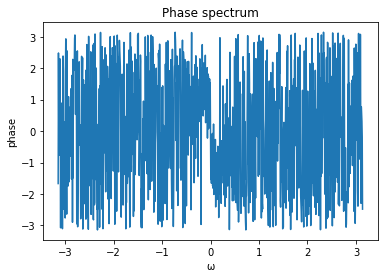

In [15]:
wow = wave.open("wow.wav") 
      
wow_signal = wow.readframes(-1) 
signal = []
for i in range(len(wow_signal)):
    signal.append(wow_signal[i])

nf = len(signal)
r = alarm.getframerate()
time = nf/r
x = np.linspace(1/r,time,nf)
plt.title("Wow signal")
plt.xlabel("time")
plt.ylabel("signal")
plt.plot(x,signal)
plt.show()

n = []
n = np.linspace(0,nf,nf)
dtft = DTFT(signal,n,w)
plot_spectrums(dtft,w)